<ipython-input-42-a47af1853b61>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted_data = melted_data.groupby(['Date', 'Location']).mean().sort_values(by='Date').reset_index()


                               Time  Latitude  Longitude        Type   Depth  \
Date                                                                           
1965-01-02 00:00:00+00:00  13:44:18   19.2460   145.6160  Earthquake  131.60   
1965-01-04 00:00:00+00:00  11:29:49    1.8630   127.3520  Earthquake   80.00   
1965-01-05 00:00:00+00:00  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
1965-01-08 00:00:00+00:00  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
1965-01-09 00:00:00+00:00  13:32:50   11.9380   126.4270  Earthquake   15.00   
...                             ...       ...        ...         ...     ...   
2016-12-28 00:00:00+00:00   8:18:01   38.3754  -118.8977  Earthquake   10.80   
2016-12-28 00:00:00+00:00   8:22:12   38.3917  -118.8941  Earthquake   12.30   
2016-12-28 00:00:00+00:00  12:38:51   36.9179   140.4262  Earthquake   10.00   
2016-12-29 00:00:00+00:00  22:30:19   -9.0283   118.6639  Earthquake   79.00   
2016-12-30 00:00:00+00:00  20:08:28   37

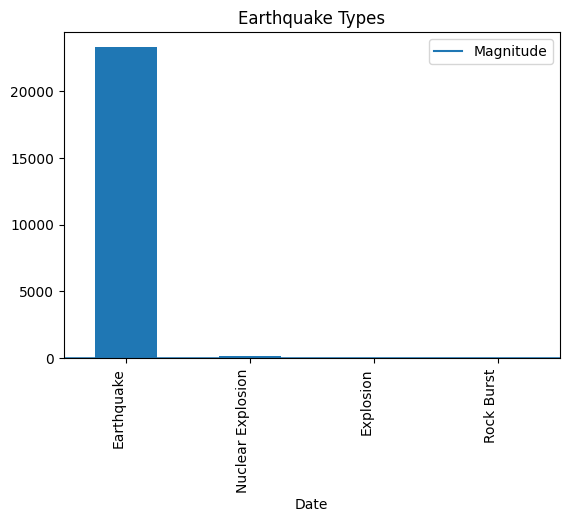

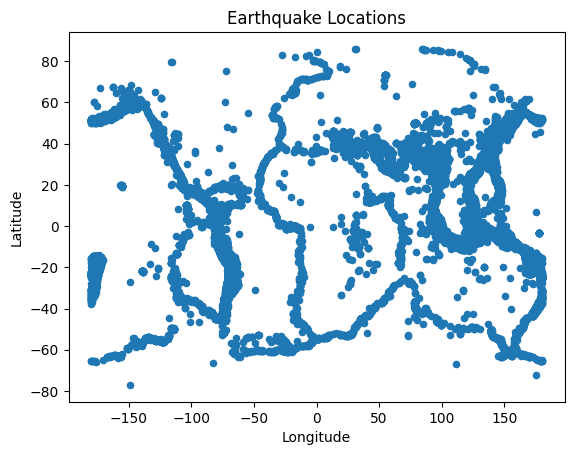

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

earthquake_data = pd.read_csv('Earthquakes_database.csv')

earthquake_data['Date'] = pd.to_datetime(earthquake_data['Date'])

# Task 1
earthquake_data_cleaned = earthquake_data.dropna(axis=1)

# Task 2
categories = ['Low Magnitude', 'Medium Magnitude', 'High Magnitude']
earthquake_data['Magnitude Category'] = pd.cut(earthquake_data['Magnitude'], bins=[0, 5, 7, 10], labels=categories)

# Task 3
melted_data = pd.melt(earthquake_data, id_vars=['Date', 'Time'], value_vars=['Latitude', 'Longitude'], var_name='Location', value_name='Coordinate')

melted_data['Date'] = pd.to_datetime(melted_data['Date'], utc=True)

melted_data = melted_data.groupby(['Date', 'Location']).mean().sort_values(by='Date').reset_index()

pivoted_data = melted_data.pivot(index='Date', columns='Location', values='Coordinate')

earthquake_data['Date'] = pd.to_datetime(earthquake_data['Date'], utc=True)

earthquake_data.set_index('Date', inplace=True)

earthquake_data.sort_index(inplace=True)

# Task 4
earthquake_data.plot(y='Magnitude', kind='line', title='Magnitude Over Time', legend=True)
earthquake_data['Type'].value_counts().plot(kind='bar', title='Earthquake Types')
earthquake_data.plot(x='Longitude', y='Latitude', kind='scatter', title='Earthquake Locations')

# Task 5
earthquake_data['Year'] = earthquake_data.index.year
earthquake_data['Month'] = earthquake_data.index.month

print(earthquake_data)

earthquake_data_cleaned.to_csv('cleaned_earthquake_data.csv', index=False)

plt.show()